# Kapitel 10

## Hopfield Netzwerk

### Matrixmultiplikation 1

In [5]:
import numpy as np
# T
x1 = np.matrix([+1,+1,+1,-1,+1,-1,-1,+1,-1])
W1 = np.matmul(x1.T,x1)
print(W1)


[[ 1  1  1 -1  1 -1 -1  1 -1]
 [ 1  1  1 -1  1 -1 -1  1 -1]
 [ 1  1  1 -1  1 -1 -1  1 -1]
 [-1 -1 -1  1 -1  1  1 -1  1]
 [ 1  1  1 -1  1 -1 -1  1 -1]
 [-1 -1 -1  1 -1  1  1 -1  1]
 [-1 -1 -1  1 -1  1  1 -1  1]
 [ 1  1  1 -1  1 -1 -1  1 -1]
 [-1 -1 -1  1 -1  1  1 -1  1]]


### Marixmultiplikation 2

In [6]:
import numpy as np
# U
x2 = np.matrix([+1,-1,+1,+1,-1,+1,+1,+1,+1])
W2 = np.matmul(x2.T,x2)
print(W2)

[[ 1 -1  1  1 -1  1  1  1  1]
 [-1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1  1  1 -1  1  1  1  1]
 [ 1 -1  1  1 -1  1  1  1  1]
 [-1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1  1  1 -1  1  1  1  1]
 [ 1 -1  1  1 -1  1  1  1  1]
 [ 1 -1  1  1 -1  1  1  1  1]
 [ 1 -1  1  1 -1  1  1  1  1]]


### Matrixaddition

In [8]:
import numpy as np
# T + U
W = W1 + W2
print(W)

[[ 2  0  2  0  0  0  0  2  0]
 [ 0  2  0 -2  2 -2 -2  0 -2]
 [ 2  0  2  0  0  0  0  2  0]
 [ 0 -2  0  2 -2  2  2  0  2]
 [ 0  2  0 -2  2 -2 -2  0 -2]
 [ 0 -2  0  2 -2  2  2  0  2]
 [ 0 -2  0  2 -2  2  2  0  2]
 [ 2  0  2  0  0  0  0  2  0]
 [ 0 -2  0  2 -2  2  2  0  2]]


### Lernen und Auswertung 

T - Muster


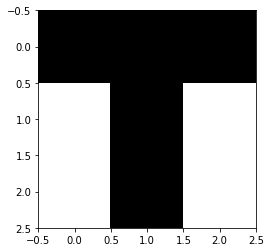

T - Matrix minus Einheitsmatrix
[[ 0.  1.  1. -1.  1. -1. -1.  1. -1.]
 [ 1.  0.  1. -1.  1. -1. -1.  1. -1.]
 [ 1.  1.  0. -1.  1. -1. -1.  1. -1.]
 [-1. -1. -1.  0. -1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1.  0. -1. -1.  1. -1.]
 [-1. -1. -1.  1. -1.  0.  1. -1.  1.]
 [-1. -1. -1.  1. -1.  1.  0. -1.  1.]
 [ 1.  1.  1. -1.  1. -1. -1.  0. -1.]
 [-1. -1. -1.  1. -1.  1.  1. -1.  0.]]
U - Muster


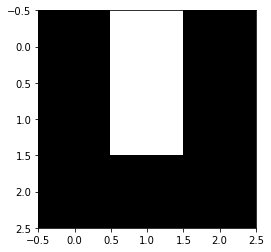

U - Matrix minus Einheitsmatrix
[[ 0. -1.  1.  1. -1.  1.  1.  1.  1.]
 [-1.  0. -1. -1.  1. -1. -1. -1. -1.]
 [ 1. -1.  0.  1. -1.  1.  1.  1.  1.]
 [ 1. -1.  1.  0. -1.  1.  1.  1.  1.]
 [-1.  1. -1. -1.  0. -1. -1. -1. -1.]
 [ 1. -1.  1.  1. -1.  0.  1.  1.  1.]
 [ 1. -1.  1.  1. -1.  1.  0.  1.  1.]
 [ 1. -1.  1.  1. -1.  1.  1.  0.  1.]
 [ 1. -1.  1.  1. -1.  1.  1.  1.  0.]]
T + U - Matrix
[[ 0.  0.  2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  2. -2. -2.  0. -2.]
 [ 2.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0. -2.  0.  0. -2.  2.  2.  0.  2.]
 [ 0.  2.  0. -2.  0. -2. -2.  0. -2.]
 [ 0. -2.  0.  2. -2.  0.  2.  0.  2.]
 [ 0. -2.  0.  2. -2.  2.  0.  0.  2.]
 [ 2.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0. -2.  0.  2. -2.  2.  2.  0.  0.]]
Inputvektor


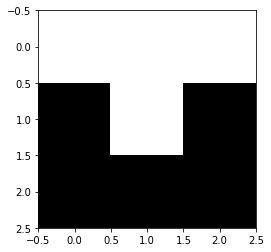

Schritt 0


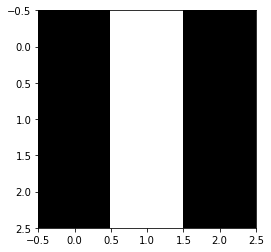

Schritt 1


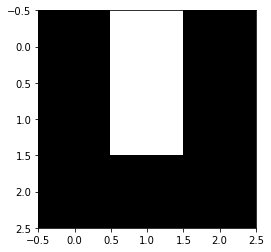

In [98]:
# Matrix und Vektoroperationen
import numpy as np
# Zeichnen
import matplotlib.pyplot as plt
%matplotlib inline

# Zeilendimension der Matrix
rowDim = 3
# Eine Matrix in einer Zeile 
lineDim = rowDim * rowDim

# Zeichnen eines Buchstabens
def drawLetter(letter):
    global rowDim
    fig = plt.figure(111)
    ax1 = fig.add_subplot(111)
    # Ausgabe der Matrix in schwarz/weiss, cm = Colormap, interpolation: diskrete Farben
    ax1.imshow(letter.reshape(rowDim,rowDim),cmap=plt.cm.binary, interpolation='nearest')
    plt.show() 
    
# Lambda für Stufenfunktion
f_step = lambda w: 1 if w >= 0 else -1
# Lambda vektorisieren 
vectorized_step = np.vectorize(f_step)

# Lernen
# Identity
Wi = np.identity(lineDim)
# T
xT = np.matrix([+1,+1,+1,-1,+1,-1,-1,+1,-1])
WT = np.matmul(xT.T,xT) - Wi
print('T - Muster')
drawLetter(xT)
print('T - Matrix minus Einheitsmatrix')
print(WT)

# U
xU = np.matrix([+1,-1,+1,+1,-1,+1,+1,+1,+1])
WU = np.matmul(xU.T,xU) - Wi
print('U - Muster')
drawLetter(xU)
print('U - Matrix minus Einheitsmatrix')
print(WU)

# Summe der Muster Matrizen
W = WT + WU
print('T + U - Matrix')
print(W)

### Auswertung
x0 = np.matrix([-1,-1,-1,+1,-1,+1,+1,+1,+1])
print('Inputvektor')
drawLetter(xX)
vt = x0.T

# Attraktor suchen
for t in range(2):
    vt1 = vectorized_act(W * vt)
    print('Schritt {}'.format(t))
    Wt1 = vt1.reshape(rowDim,rowDim)
    drawLetter(vt1)
    vt = vt1 

### Lernen und Auswertung GROß

T - Muster


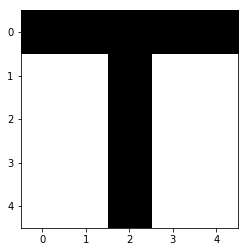

T - Matrix minus Einheitsmatrix
[[ 0.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 1.  0.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 1.  1.  0.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 1.  1.  1.  0.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 1.  1.  1.  1.  0. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1.  0.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.
   1.  1.  1.  1. -1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  0. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.
   1.  1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1.  0. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1.  1.  1. -1.  0.  1.  1.  1. -1.  1.  1.  1.  1. -1.
   1.  1.  1.  1. -1.  1.  1.]
 [-1. -1. -1. -1. -1.  

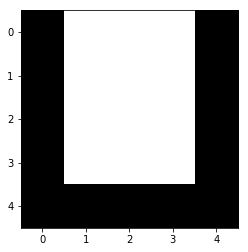

U - Matrix minus Einheitsmatrix
[[ 0. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
  -1.  1.  1.  1.  1.  1.  1.]
 [-1.  0.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.
   1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  0.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.
   1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  1.  0. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.
   1. -1. -1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  0.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
  -1.  1.  1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1.  1.  0. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
  -1.  1.  1.  1.  1.  1.  1.]
 [-1.  1.  1.  1. -1. -1.  0.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.
   1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  1.  1. -1. -1.  1.  0.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.
   1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  1.  1. -1. -1.  1.  1.  0. -1. -1.  1.  1.  1. -1. -1.  1.  1.
   1. -1. -1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1.  

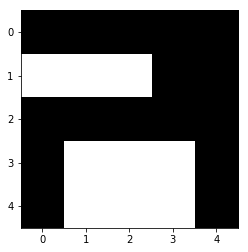

Schritt 0


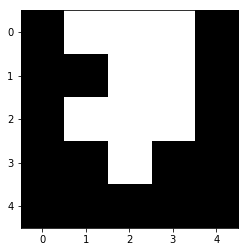

Schritt 1


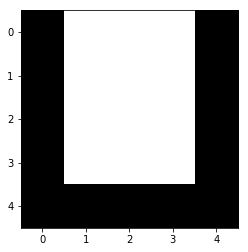

In [94]:
# Matrix und Vektoroperationen
import numpy as np

#import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

# Zeilendimension der Matrix
rowDim = 5
# Eine Matrix in einer Zeile 
lineDim = rowDim * rowDim

# Zeichnen eines Buchstabens
def drawLetter(letter):
    global rowDim
    fig = plt.figure(111)
    ax1 = fig.add_subplot(111)
    # Ausgabe der Matrix in schwarz/weiss, cm = Colormap, interpolation: diskrete Farben
    ax1.imshow(letter.reshape(rowDim,rowDim),cmap=plt.cm.binary, interpolation='nearest')
    plt.show() 
    
# Lambda für Stufenfunktion
f_step = lambda w: 1 if w >= 0 else -1
# Lambda vektorisieren 
vectorized_step = np.vectorize(f_step)

# Lernen
# Identity
Wi = np.identity(lineDim)
# T
xT = np.matrix([1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1])
WT = np.matmul(xT.T,xT) - Wi
print('T - Muster')
drawLetter(xT)
print('T - Matrix minus Einheitsmatrix')
print(WT)

# U
xU = np.matrix([1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1])
WU = np.matmul(xU.T,xU) - Wi
print('U - Muster')
drawLetter(xU)
print('U - Matrix minus Einheitsmatrix')
print(WU)

# Summe der Muster Matrizen
W = WT + WU
print('T + U - Matrix')
print(W)

### Auswertung
xX = np.matrix([1,1,1,1,1,-1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1,1])
print('Inputvektor')
drawLetter(xX)
vt = xX.T

# Attraktor suchen
for t in range(2):
    vt1 = vectorized_act(W * vt)
    print('Schritt {}'.format(t))
    Wt1 = vt1.reshape(rowDim,rowDim)
    drawLetter(vt1)
    vt = vt1 